# Data Science for Supply Chain Forecasting by Nicolas Vandeput (2nd ed.)
### Supplement by Edward Kennedy, July 2022


## Chapter 1
Define a moving average functon that returns a dataframe displaying demand, forecast, and error. Demand is a user furnished input (a Python list of observed demands) labeled d, forecast is the mean of the demand from the last n time increments, and error is the actual demand minus the forecast.

Input parameters are the aforementioned d, the number of periods that need to be forecast into the future (default extra_periods = 1), and n the number of time increments backward that will be averaged (default n = 3).

In [1]:
import pandas as pd
import numpy as np

In [2]:
def moving_average(d, extra_periods = 1, n = 3):
    
    # Historical period length
    cols = len(d)
    
    # Append np.nan into demand array to cover future periods
    d = np.append(d,[np.nan]*extra_periods)
    
    # Define the forecast array.
    f = np.full(cols+extra_periods, np.nan)
    
    for t in range(n,cols):
        f[t]=np.mean(d[t-n:t])
    
    # Forecast for all extra periods
    f[t+1:] = np.mean(d[t-n+1: t+1])
    
    # Return a Dataframe with the demand, forecast, and error
    df = pd.DataFrame.from_dict({'Demand': d, 'Forecast':f, 'Error': d-f})
    print(df)
    
    return df

Define the sequence of demands that will be utilized for the forecast. Write them as a Python list.  The same list as used in the book is provided below.

In [3]:
d = [28, 19, 17, 13, 19, 16, 19, 18, 13, 16, 16, 11, 18, 15, 13, 15, 13, 11, 13, 10, 12]

Call the moving average function using four extra time increments and setting the moving average to three time increments.

In [4]:
df = moving_average(d, extra_periods= 4, n=3)

    Demand   Forecast     Error
0     28.0        NaN       NaN
1     19.0        NaN       NaN
2     17.0        NaN       NaN
3     13.0  21.333333 -8.333333
4     19.0  16.333333  2.666667
5     16.0  16.333333 -0.333333
6     19.0  16.000000  3.000000
7     18.0  18.000000  0.000000
8     13.0  17.666667 -4.666667
9     16.0  16.666667 -0.666667
10    16.0  15.666667  0.333333
11    11.0  15.000000 -4.000000
12    18.0  14.333333  3.666667
13    15.0  15.000000  0.000000
14    13.0  14.666667 -1.666667
15    15.0  15.333333 -0.333333
16    13.0  14.333333 -1.333333
17    11.0  13.666667 -2.666667
18    13.0  13.000000  0.000000
19    10.0  12.333333 -2.333333
20    12.0  11.333333  0.666667
21     NaN  11.666667       NaN
22     NaN  11.666667       NaN
23     NaN  11.666667       NaN
24     NaN  11.666667       NaN


As expected there are no forecasts or computed errors for the first n=3 periods because the moving average would require demands prior to period 0. As a sanity check consider period 3: we have (37 + 60 +85)/3 = 60.67 which is indeed the same as the first forecasted value. The actual demand was for 112 units so the corresponding error is 112 - 60.67 = 51.33 which checks with our results.

### Plot the moving average forecast. 

<AxesSubplot:title={'center':'Moving Average'}>

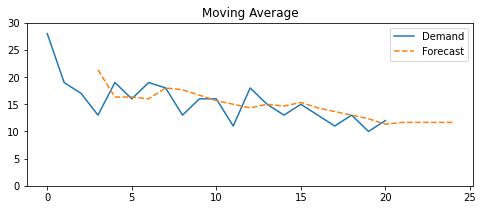

In [5]:
df[['Demand', 'Forecast']].plot(style=['-', '--'], title = 'Moving Average', ylim = (0, 30), figsize=(8,3))

In [6]:
df.index.name = 'Period'

<AxesSubplot:title={'center':'Moving Average'}, xlabel='Period'>

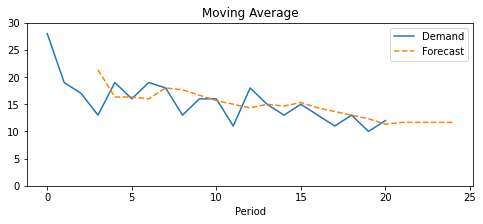

In [7]:
df[['Demand', 'Forecast']].plot(style=['-', '--'], title = 'Moving Average', ylim = (0, 30), figsize=(8,3))